In [1]:
import numpy as np
import pandas as pd

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split, GridSearchCV
# Linear Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

### *Load Data & Quick Overview*

In [2]:
df = pd.read_csv("social_network_ads.csv")

df.head(7)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0


In [3]:
df.tail(7)

,User ID,Gender,Age,EstimatedSalary,Purchased
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
# Normalizing Estimated salary
df.EstimatedSalary = df.EstimatedSalary/1000

df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.00000,400.000000
mean,1.569154e+07,37.655000,69.74250,0.357500
std,7.165832e+04,10.482877,34.09696,0.479864
min,1.556669e+07,18.000000,15.00000,0.000000
25%,1.562676e+07,29.750000,43.00000,0.000000
50%,1.569434e+07,37.000000,70.00000,0.000000
75%,1.575036e+07,46.000000,88.00000,1.000000
max,1.581524e+07,60.000000,150.00000,1.000000


### *Visualize Data*

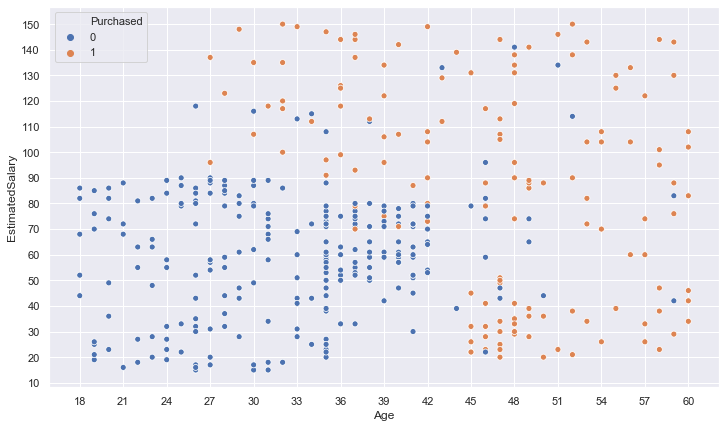

In [6]:
# age vs estimated salary/ groups: purchased
plt.figure(figsize=(12,7))
sns.scatterplot(df.Age, df.EstimatedSalary, hue=df.Purchased)
plt.xticks(np.arange(df.Age.min(), df.Age.max()+1, 3))
plt.yticks(np.arange(10,151, 10))
plt.show()

> We can see that, our data can be seperated linearly. Results will not be perfect but it can be seperated linearaly.

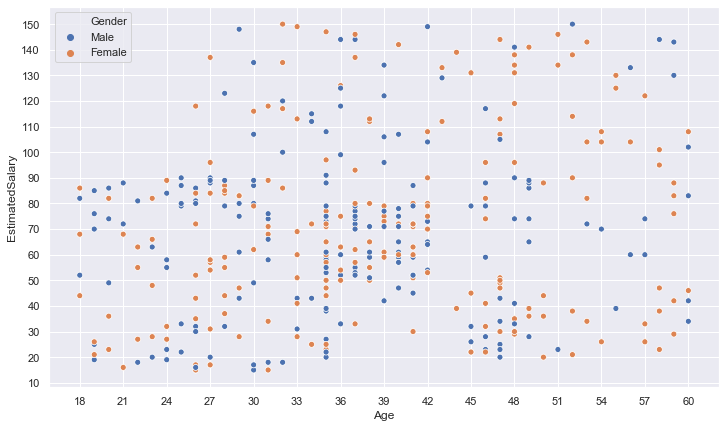

In [7]:
# age vs estimated salary/ groups: gender
plt.figure(figsize=(12,7))
sns.scatterplot(df.Age, df.EstimatedSalary, hue=df.Gender)
plt.xticks(np.arange(df.Age.min(), df.Age.max()+1, 3))
plt.yticks(np.arange(10,151, 10))
plt.show()

> We have a homogeneous data, among gender. We can see that there is no trend between Salary, and Age based on gender.

### *Linear Classifiers*

In [8]:
# Prepare Data
df.Gender = df.Gender.map({"Female":0, "Male":1})
X = df.drop(["User ID", "Purchased", "Gender"], axis=1)
y = df.Purchased

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [9]:
# Logistic Regression with deafult params.
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_train_score = lr.score(X_train, y_train)
lr_test_score  = lr.score(X_test, y_test)
print(f"Train Score : {lr_train_score}")
print(f"Test  Score : {lr_test_score}")

Train Score : 0.8375
Test  Score : 0.8875


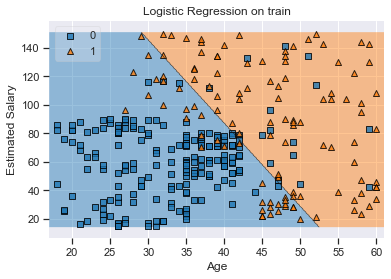

In [10]:
plot_decision_regions(X_train.values, y_train.values, clf=lr, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression on train')
plt.show()

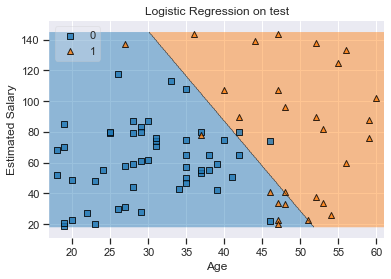

In [11]:
plot_decision_regions(X_test.values, y_test.values, clf=lr, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Logistic Regression on test')
plt.show()

In [12]:
# LinearSVC with default params
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

lsvc_train_score = lsvc.score(X_train, y_train)
lsvc_test_score  = lsvc.score(X_test, y_test)
print(f"Train Score : {lsvc_train_score}")
print(f"Test  Score : {lsvc_test_score}")

Train Score : 0.6125
Test  Score : 0.65


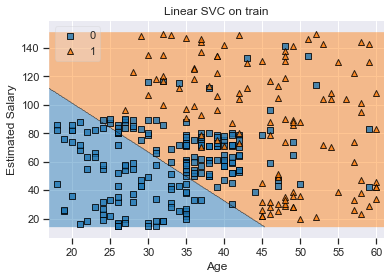

In [13]:
plot_decision_regions(X_train.values, y_train.values, clf=lsvc, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Linear SVC on train')
plt.show()

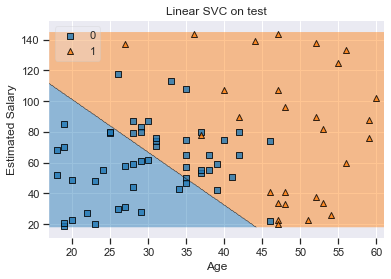

In [14]:
plot_decision_regions(X_test.values, y_test.values, clf=lsvc, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Linear SVC on test')
plt.show()

In [15]:
# SVC with default params
svc = SVC()
svc.fit(X_train, y_train)

svc_train_score = svc.score(X_train, y_train)
svc_test_score  = svc.score(X_test, y_test)
print(f"Train Score : {svc_train_score}")
print(f"Test  Score : {svc_test_score}")

Train Score : 0.903125
Test  Score : 0.9375


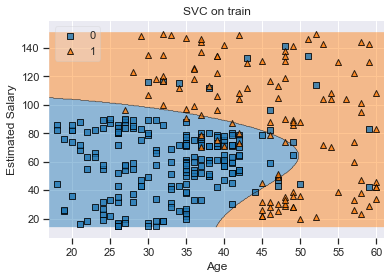

In [16]:
plot_decision_regions(X_train.values, y_train.values, clf=svc, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVC on train')
plt.show()

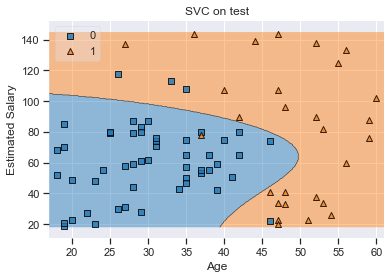

In [17]:
plot_decision_regions(X_test.values, y_test.values, clf=svc, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVC on test')
plt.show()

### *Hyperparameter Tuning*

In [18]:
# Regularize Logistic Regression
lr_params = {"C":[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5],
            "penalty":["l1", "l2", "elasticnet", "none"]}
lr_searcher = GridSearchCV(lr, lr_params, cv=7)
lr_searcher.fit(X_train, y_train)

lr_searcher_train_score = lr_searcher.best_estimator_.score(X_train, y_train)
lr_searcher_test_score  = lr_searcher.best_estimator_.score(X_test, y_test)

print(f"Best Params : {lr_searcher.best_params_}")
print(f"Train Score : {lr_searcher_train_score}")
print(f"Test  Score : {lr_searcher_test_score}")

Best Params : {'C': 0.0001, 'penalty': 'none'}
Train Score : 0.8375
Test  Score : 0.8875


> As we can see there is no improvement, after we tuned the ***C*** and ***penalty*** parameters. We can keep parameters as their default values or we can use the calculated best parameter values here.

In [19]:
# Linear SVC
# We'll tune the C and penalty, and loss parameters.
# Unlike Logistic Regression, LinearSVC does not support the elasticnet penalty.
# Only supports l1 and l2 penalties.
lsvc_params = {
                "C":[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5],
                "penalty":["l1", "l2"],
                "loss": ["hinge", "squared_hinge"]
}

lsvc_searcher = GridSearchCV(lsvc, lsvc_params, cv=7)
lsvc_searcher.fit(X_train, y_train)

lsvc_searcher_train_score = lsvc_searcher.best_estimator_.score(X_train, y_train)
lsvc_searcher_test_score  = lsvc_searcher.best_estimator_.score(X_test, y_test)

print(f"Best Params : {lsvc_searcher.best_params_}")
print(f"Train Score : {lsvc_searcher_train_score}")
print(f"Test  Score : {lsvc_searcher_test_score}")

Best Params : {'C': 0.05, 'loss': 'squared_hinge', 'penalty': 'l2'}
Train Score : 0.828125
Test  Score : 0.875


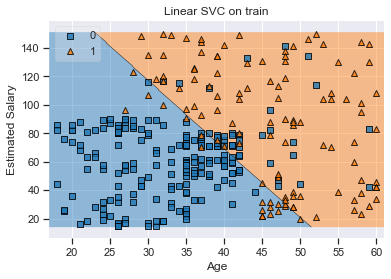

In [20]:
plot_decision_regions(X_train.values, y_train.values, clf=lsvc_searcher.best_estimator_, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Linear SVC on train')
plt.show()

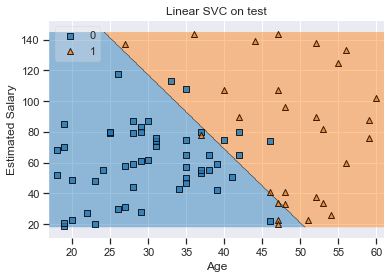

In [21]:
plot_decision_regions(X_test.values, y_test.values, clf=lsvc_searcher.best_estimator_, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Linear SVC on test')
plt.show()

> As we can see, after hyperparameter tuning, we get much more better results than the default LinearSVC model. But still we have a bunch of observations classified as ***Not Purchased(0)*** eventhough those are belongs to class ***Purchased(1)***. We do not want this, our purpose here is to classify each person in right class(True positive/ True negative).

In [23]:
# SVC
# In this classifier we have gamma parameter for smoothing,
# also C  parameter for regularization.
# We'll try finding the optimal hyperparameters among mentioned parameters.
svc_params = {
                "C":[0.001, 0.01, 0.1, 0.5, 1, 5],
                "gamma" : [0.001, 0.01, 0.1, 0.5, 1, 5]
}

svc_searcher = GridSearchCV(svc, svc_params, cv=7)
svc_searcher.fit(X_train, y_train)

svc_searcher_train_score = svc_searcher.best_estimator_.score(X_train, y_train)
svc_searcher_test_score  = svc_searcher.best_estimator_.score(X_test, y_test)

print(f"Best Params : {svc_searcher.best_params_}")
print(f"Train Score : {svc_searcher_train_score}")
print(f"Test  Score : {svc_searcher_test_score}")

Best Params : {'C': 0.5, 'gamma': 0.001}
Train Score : 0.909375
Test  Score : 0.9375


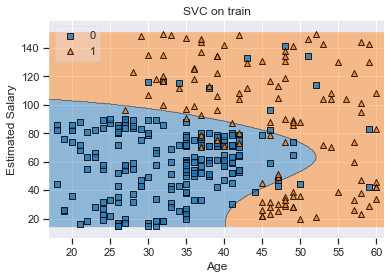

In [27]:
plot_decision_regions(X_train.values, y_train.values, clf=svc_searcher.best_estimator_, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVC on train')
plt.show()

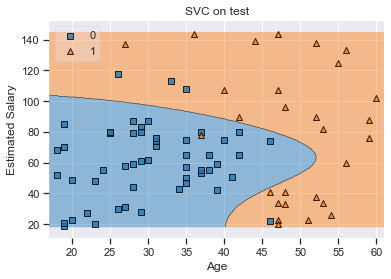

In [26]:
plot_decision_regions(X_test.values, y_test.values, clf=svc_searcher.best_estimator_, legend=2)

# Adding axes annotations
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVC on test')
plt.show()

> Compared to linear models, SVC model is much more better. Even with precision and recall ratios. In this example, we've used SVC with ***rbf*** kernel. SVC uses rbf by default. We just tuned the smoothing(gamma) and regularization(C) parameters. 
***